In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0-rc1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Embedding, Dense, MaxPooling1D

In [4]:
df = pd.read_csv(r'C:/Users/RISHABH/Desktop/PROJECTS/CNN-for-Text/spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})

In [11]:
Y = df['b_labels'].values

In [12]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.3)

In [14]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [15]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Foun {V} unique tokens")

Foun 7422 unique tokens


In [16]:
data_train = pad_sequences(sequence_train)
print(f"The shape of train data tensor is {data_train.shape}")

T = data_train.shape[1]

data_test = pad_sequences(sequence_test, maxlen=T)
print(f"The shape of test data tensor is {data_test.shape}")

The shape of train data tensor is (3900, 189)
The shape of test data tensor is (1672, 189)


In [19]:
D = 20

i = Input(shape=(T, ))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Training the model....")

r = model.fit(data_train, Y_train, epochs=5, validation_data=(data_test, Y_test))

Training the model....
Epoch 1/5
122/122 [==============================] - 2s 7ms/step - loss: 0.3950 - accuracy: 0.8626 - val_loss: 0.2790 - val_accuracy: 0.8672
Epoch 2/5
122/122 [==============================] - 1s 6ms/step - loss: 0.1651 - accuracy: 0.9300 - val_loss: 0.1048 - val_accuracy: 0.9593
Epoch 3/5
122/122 [==============================] - 1s 6ms/step - loss: 0.0290 - accuracy: 0.9885 - val_loss: 0.0755 - val_accuracy: 0.9791
Epoch 4/5
122/122 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0862 - val_accuracy: 0.9821
Epoch 5/5
122/122 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0866 - val_accuracy: 0.9821


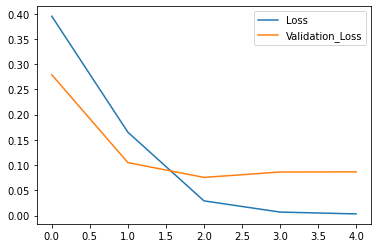

In [21]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation_Loss')
plt.legend()

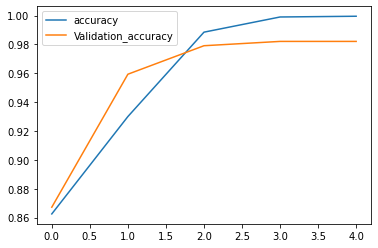

In [22]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='Validation_accuracy')
plt.legend()

In [24]:
model.evaluate(data_test, Y_test)

53/53 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9821


[0.08658948540687561, 0.9820573925971985]

In [26]:
p_test = model.predict(data_test)
misclassified_idx = np.where(p_test!=Y_test)[0]
i = np.random.choice(misclassified_idx)
print("True Label: %s Predicted: %s" % (data_test[i], p_test[i]))

True Label: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   13 6774 1547  505    9
   12   71   88    2 3024  258  793] Predicted: [0.78430593]
